# Spam detection from sms

In this project we will be working to classify spam sms messages. The data is obtained from Kaggle (https://www.kaggle.com/uciml/sms-spam-collection-dataset). The data is present with each sms and their assigned label - Spam or ham (not spam). 

We will be using CountVectorizer and TfidfVectorizer for priocessing the text data.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

In [59]:
df1 = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [60]:
df1.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

 As you can see that there are some null columns this might be due to content being divided into multiple columns we can concatenate them into a single column and remove unwanted columns and change the column names to label and data.

In [61]:
df1['data'] = df1['v2']+df1['Unnamed: 2'].fillna("")+df1['Unnamed: 3'].fillna("")+df1['Unnamed: 4'].fillna("")

In [62]:
df1 = df1.drop(['v2','Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1)

In [63]:
df1.columns = ['labels','data']

Let us split the data into train and test split 

In [46]:
df1_train,df1_test,y_train,y_test=train_test_split(df1['data'],df1['labels'],test_size = 0.33)

We can either use CountVectorizer or TfIdfVectorizer to process the text and the result might be different for both so we will be trying out both of them.

We are using MultinomialNB for the model, other models such as Adaboost can also be used for this.

In [69]:
tfidf = TfidfVectorizer(decode_error = 'ignore')
X_train = tfidf.fit_transform(df1_train)
X_test = tfidf.transform(df1_test)

model = MultinomialNB()
model.fit(X_train,y_train)

print("Train score", model.score(X_train,y_train))
print("Train score", model.score(X_test,y_test))

Train score 0.9716046075542459
Train score 0.9510603588907015


In [65]:
featurizer = CountVectorizer(decode_error = 'ignore')
X_train = featurizer.fit_transform(df1_train)
X_test = featurizer.transform(df1_test)
model = MultinomialNB()
model.fit(X_train,y_train)

print("Train score", model.score(X_train,y_train))
print("Train score", model.score(X_test,y_test))

Train score 0.994374497723011
Train score 0.9809679173463839


We can see that CountVectorizer gave better result for this dataset.

Let us visualize the text data and see how different they are, we will be using wordcloud for this. 

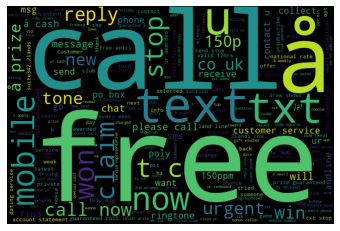

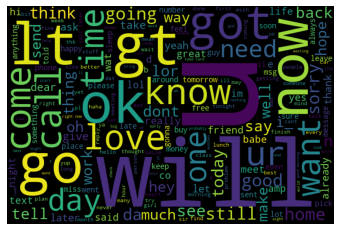

In [67]:
# visualize the data
def visualize(label):
  words = ''
  for msg in df1[df1['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')



In [83]:
# see what we're getting wrong
X = tfidf.transform(df1['data'])
df1['predictions'] = model.predict(X)

# things that should be spam
sneaky_spam = df1[(df1['predictions'] == 'ham') & (df1['labels'] == 'spam')]['data']

for msg in sneaky_spam[:5]:
    print(msg)



FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcollex Ltd 08700621170150p per msg reply Stop to end


In [88]:
# things that should not be spam
not_actually_spam = df1[(df1['predictions'] == 'spam') & (df1['labels'] == 'ham')]['data']
for msg in not_actually_spam:
    print(msg)